In [488]:
import json
from matplotlib import pyplot as plt
from collections import defaultdict
from sklearn import linear_model
import numpy as np
import random
import gzip
import math

In [489]:
import warnings
warnings.filterwarnings("ignore")

In [490]:
def assertFloat(x): # Checks that an answer is a float
    assert type(float(x)) == float

def assertFloatList(items, N):
    assert len(items) == N
    assert [type(float(x)) for x in items] == [float]*N

In [491]:
f = gzip.open("young_adult_10000.json.gz")
dataset = []
for l in f:
    dataset.append(json.loads(l))

In [492]:
len(dataset)

10000

In [493]:
answers = {} # Put your answers to each question in this dictionary

In [494]:
dataset[:5]

[{'user_id': '8842281e1d1347389f2ab93d60773d4d',
  'book_id': '2767052',
  'review_id': '248c011811e945eca861b5c31a549291',
  'rating': 5,
  'review_text': "I cracked and finally picked this up. Very enjoyable quick read - couldn't put it down - it was like crack. \n I'm a bit bothered by the lack of backstory of how Panem and the Hunger Games come about. It is just kind of explained away in a few paragraphs and we are left to accept this very strange world where teenagers are pitted into an arena each year to kill each other? I was expecting it because I've seen Battle Royale, but I would have appreciated knowing more of the backstory of how the world could have come into such a odd state. \n I suppose what makes a book like this interesting is thinking about the strategy of it all. The players are going to be statistically encouraged to band together because they will last longer that way, but by definition of course any partnership will be broken, and the drama of how that unfolds i

In [495]:
### Question 1

In [496]:
def feature(datum): #predict rating from number of exclamation points
    feat = [1, datum['review_text'].count('!')]
    return feat
    

In [497]:
X = [feature(d) for d in dataset] #how many ! in a review
Y = [d['rating'] for d in dataset] #overall rating

In [498]:
X[:10]


[[1, 0],
 [1, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 4],
 [1, 2],
 [1, 1],
 [1, 0]]

In [499]:
Y[:10]

[5, 5, 4, 2, 5, 5, 5, 5, 5, 5]

In [500]:
model = linear_model.LinearRegression().fit(X, Y)
theta0, theta1 = model.intercept_.item(), model.coef_[1].item()

theta0, theta1

(3.6885330408320325, 0.071090190199541)

In [501]:
from sklearn.metrics import root_mean_squared_error
mse = root_mean_squared_error(Y, model.predict(X))**2
mse = mse.item()

In [502]:
theta, _, _, _ = np.linalg.lstsq(X, Y, rcond=None) #just trying out another way

In [503]:
theta

array([3.68853304, 0.07109019])

In [504]:
answers['Q1'] = [theta0, theta1, mse]

In [505]:
assertFloatList(answers['Q1'], 3) # Check the format of your answer (three floats)

In [506]:
### Question 2

In [507]:
def feature(datum):
    feat = [1, len(datum['review_text']), datum['review_text'].count('!')]
    return feat

In [508]:
X = [feature(d) for d in dataset] #length of review, number of ! in review
Y = [d['rating'] for d in dataset] #overall rating
X[:10]


[[1, 1326, 0],
 [1, 224, 1],
 [1, 118, 0],
 [1, 1952, 0],
 [1, 554, 0],
 [1, 486, 0],
 [1, 257, 4],
 [1, 10, 2],
 [1, 31, 1],
 [1, 62, 0]]

In [509]:
model = linear_model.LinearRegression().fit(X, Y)
theta0, theta1, theta2 = model.intercept_.item(), model.coef_[1].item(), model.coef_[2].item()
mse = root_mean_squared_error(Y, model.predict(X))**2
mse = mse.item()

In [510]:
answers['Q2'] = [theta0, theta1, theta2, mse]
answers['Q2']

[3.717512807797201,
 -4.1215065294879574e-05,
 0.07527591733232615,
 1.5214029246165834]

In [511]:
assertFloatList(answers['Q2'], 4)

In [512]:
### Question 3

In [513]:
def feature(datum, deg): #poly from 1 to 5
    feat = [1] + [datum['review_text'].count('!')**i for i in range(1, deg+1)]
    return feat

In [514]:
X_train = [[feature(d, i) for d in dataset] for i in range(1, 6)]
Y = [d['rating'] for d in dataset]
models = [linear_model.LinearRegression().fit(X_train[i], Y) for i in range(5)]
mses = [root_mean_squared_error(Y, models[i].predict(X_train[i]))**2 for i in range(5)]
mses = [mse.item() for mse in mses]


In [515]:
mses

[1.5231747404538287,
 1.504668610625092,
 1.4966845515179232,
 1.4904477302230692,
 1.4896106953961645]

In [516]:
answers['Q3'] = mses

In [517]:
assertFloatList(answers['Q3'], 5)# List of length 5

In [518]:
### Question 4

In [519]:
training_set, test_set = dataset[:5000], dataset[5000:]

X_train = [[feature(d, i) for d in training_set] for i in range(1, 6)]
X_test = [[feature(d, i) for d in test_set] for i in range(1, 6)]

Y_train = [d['rating'] for d in training_set]
Y_test = [d['rating'] for d in test_set]

models = [linear_model.LinearRegression().fit(X_train[i], Y_train) for i in range(5)]
mses = [root_mean_squared_error(Y_test, models[i].predict(X_test[i]))**2 for i in range(5)]
mses = [mse.item() for mse in mses]

mses

[1.524874385986629,
 1.4977199259322447,
 1.4856632190311285,
 1.4767337440081165,
 1.480957727369849]

In [520]:
answers['Q4'] = mses

In [521]:
assertFloatList(answers['Q4'], 5)

In [522]:
### Question 5

In [523]:
from sklearn.metrics import mean_absolute_error
theta0 = np.median(Y_test).item()
mae = mean_absolute_error(Y_test, [theta0] * len(Y_test)).item()

theta0, mae


(4.0, 0.907)

In [524]:
answers['Q5'] = mae

In [525]:
assertFloat(answers['Q5'])

In [526]:
### Question 6

In [527]:
f = open("beer_50000.json")
dataset = []
for l in f:
    if 'user/gender' in l:
        dataset.append(eval(l))

In [528]:
dataset[:5]

[{'review/appearance': 4.0,
  'beer/style': 'American Double / Imperial IPA',
  'review/palate': 4.0,
  'review/taste': 4.5,
  'beer/name': 'Cauldron DIPA',
  'review/timeUnix': 1293735206,
  'user/gender': 'Male',
  'user/birthdayRaw': 'Jun 16, 1901',
  'beer/ABV': 7.7,
  'beer/beerId': '64883',
  'user/birthdayUnix': -2163081600,
  'beer/brewerId': '1075',
  'review/timeStruct': {'isdst': 0,
   'mday': 30,
   'hour': 18,
   'min': 53,
   'sec': 26,
   'mon': 12,
   'year': 2010,
   'yday': 364,
   'wday': 3},
  'user/ageInSeconds': 3581417047,
  'review/overall': 4.0,
  'review/text': "According to the website, the style for the Caldera Cauldron changes every year. The current release is a DIPA, which frankly is the only cauldron I'm familiar with (it was an IPA/DIPA the last time I ordered a cauldron at the horsebrass several years back). In any event... at the Horse Brass yesterday.\t\tThe beer pours an orange copper color with good head retention and lacing. The nose is all hoppy 

In [529]:
def feature(datum): #predict rating from number of exclamation points
    feat = [1, datum['review/text'].count('!')]
    return feat

In [530]:
X = [feature(d) for d in dataset]
Y = [d['user/gender'] == "Female" for d in dataset] #1 for female 

(20095, 0, 308, 0, 0.5)

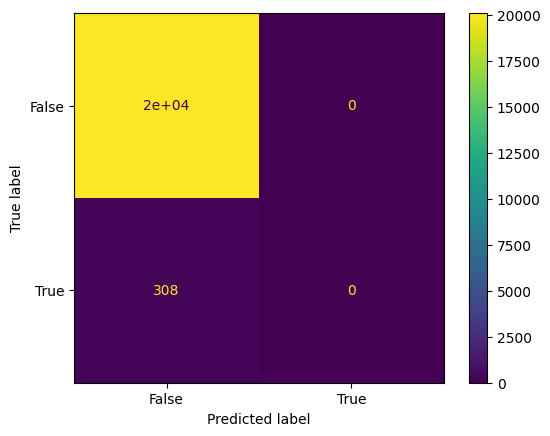

In [531]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
model = linear_model.LogisticRegression().fit(X, Y)
matrix = confusion_matrix(Y, model.predict(X))
_ = ConfusionMatrixDisplay.from_estimator(model , X, Y)

TN, FP, FN, TP = matrix[0][0].item(), matrix[0][1].item(), matrix[1][0].item(), matrix[1][1].item()
BER = 0.5 * (FP / (FP + TN) + FN / (FN + TP))
TN, FP, FN, TP, BER

In [532]:
answers['Q6'] = [TP, TN, FP, FN, BER]

In [533]:
assertFloatList(answers['Q6'], 5)

In [534]:
### Question 7

(16332, 3763, 220, 88, 0.4507731134255145)

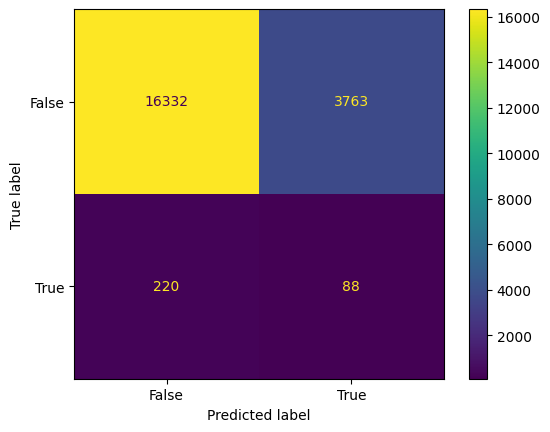

In [535]:
model = linear_model.LogisticRegression(class_weight="balanced").fit(X, Y)
matrix = confusion_matrix(Y, model.predict(X))
_ = ConfusionMatrixDisplay.from_estimator(model , X, Y)

TN, FP, FN, TP = matrix[0][0].item(), matrix[0][1].item(), matrix[1][0].item(), matrix[1][1].item()
BER = 0.5 * (FP / (FP + TN) + FN / (FN + TP))
TN, FP, FN, TP, BER

In [536]:
answers["Q7"] = [TP, TN, FP, FN, BER]

In [537]:
assertFloatList(answers['Q7'], 5)

In [538]:
### Question 8

In [539]:
from sklearn.metrics import precision_score

predictions = model.predict_proba(X)[:, 1]

K_values = [1, 10, 100, 1000, 10000]
precisionList = []

for K in K_values:
    top_k = np.argsort(predictions)[-K:]
    precisionList.append(precision_score(Y, [i in top_k for i in range(len(Y))]).item())


In [540]:
answers['Q8'] = precisionList

In [541]:
assertFloatList(answers['Q8'], 5) #List of five floats

In [542]:
answers

{'Q1': [3.6885330408320325, 0.071090190199541, 1.5231747404538287],
 'Q2': [3.717512807797201,
  -4.1215065294879574e-05,
  0.07527591733232615,
  1.5214029246165834],
 'Q3': [1.5231747404538287,
  1.504668610625092,
  1.4966845515179232,
  1.4904477302230692,
  1.4896106953961645],
 'Q4': [1.524874385986629,
  1.4977199259322447,
  1.4856632190311285,
  1.4767337440081165,
  1.480957727369849],
 'Q5': 0.907,
 'Q6': [0, 20095, 0, 308, 0.5],
 'Q7': [88, 16332, 3763, 220, 0.4507731134255145],
 'Q8': [0.0, 0.0, 0.02, 0.02, 0.0162]}

In [543]:
f = open("answers_hw1.txt", 'w') # Write your answers to a file
f.write(str(answers) + '\n')
f.close()